In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Beschreibende Statistik

## Übersicht

#### Lagemaß
#### Streuung
#### Graphiken
#### Mehrdimensionale Daten
#### <span style="color:blue">Abhängigkeit</span>
- Korrelation
- <span style="color:blue">Regression</span>
    - <span style="color:blue">linear</span>
    - <span style="color:blue">polynomial</span>

## Mehrdimensionale Daten - Regression

#### Korrelation
- Voraussetzung: Zusammenhang von zusammengehörigen Daten ist nachgewiesen
- Korrelationskoeffizient $\neq 0$

#### Beispiele:
- Strom und Spannung: festes Verhältnis gemäß Ohmschen Gesetzes
- Luftdruck und Höhe über Meer: Barometrische Höhenformel

## Frage: Wie *stark* hängt y von x ab?

#### Beispiel: Fahrstrecke *x* und Fahrzeit *t*
- Zusammenhang: je mehr Zeit *t*, desto weiter die Strecke *s*
    - linear $x\sim t$ 
    - Proportionalitätsfaktor "*Geschwindigkeit v*": $x=v\cdot t$
- Für $x=10$km benötigen Sie $t=12$Minuten

In [4]:
'''Python as a pocket calculator: calculate car speed'''
xmin = 12                   # time in minutes
xh = xmin/60                # time in hours
y = 10                      # distance in km
v = y / xh                  # speed in km/h
print('Going {} km in {} mins, your speed is {} km/h'.format(y, xmin, v))

Going 10 km in 12 mins, your speed is 50.0 km/h


#### Anwendung
Bei linearer Abhängigkeit $x = v\cdot t$ erlaubt der Proportionalitätsfaktor Vorhersagen

Beispielsweise: wie lang ist die zurückgelegte Strecke in 1 Sekunde?

$$x = v\cdot t = \frac{10\text{km}}{10\text{min}}\cdot 1s = \frac{10000\text{m}}{10\cdot 60\text{s}} \cdot 1s = 16.7m$$

#### Ergebnis: 
In der Reaktionszeit von 1s legt ein Auto im Stadtverkehr 17m zurück

### Mehrere Messungen
Mehrere ($n$) Messungen $y_i$ zu verschiedenen Werten der $x$-Variable, hier Schrittperiodendauer (Zeiten, Längen, Alter, Höhe, ...)

In [13]:
'''read data: speed vs stepping period of walking fly Drosophila
   two columns space-separated: period [ms], speed [mm/s] '''
data = np.genfromtxt('data/Drosophila_geschw-periode.dat').T #ranspose
print('data is of size {}, a {} of {} of {}'
      .format(data.shape, type(data), type(data[0]), type(data[0, 1])))
print('period {} ...'.format(data[0, :5]))   # 1d-array of periods
print('speed {} ...'.format(data[1, :5]))    # 1d-array of speed

data is of size (2, 297), a <class 'numpy.ndarray'> of <class 'numpy.ndarray'> of <class 'numpy.float64'>
period [60. 70. 70. 70. 70.] ...
speed [29.  34.  34.6 30.3 26.9] ...


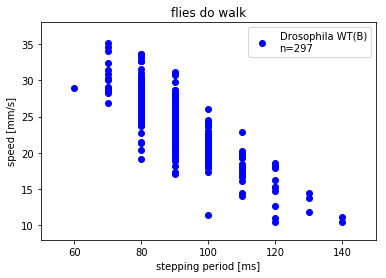

In [14]:
'''show the data'''
plt.plot(data[0], data[1], 'bo', label='Drosophila WT(B)\nn={}'.format(len(data[0])))
plt.axis((50, 150, 8, 38))
plt.title('flies do walk')
plt.xlabel('stepping period [ms]')
plt.ylabel('speed [mm/s]')
plt.legend(loc='upper right');

### Korrelation?

In [15]:
'''correlation between speed and period?'''
r_xy = np.corrcoef(data)[0, 1]
print('correlation coefficient r_xy = {:.3f}'.format(r_xy))

correlation coefficient r_xy = -0.819


### Regression? 
lineare Abhängigkeit
- mehrere x-Werte (Periodendauern)
- mehrere Messungen (Geschwindigkeit)

#### *Ausgleichsgerade*

### Methode der *Kleinsten Quadratischen Abweichung* 
(C. F. Gauss 1809, A. M. Legendre 1805)
$$\underset{a, b}{\mathrm{argmin}}\sum_i(y_i-f_{a,b}(x_i))^2$$ 
des linearen Zusammenhangs 
$$y = f_{a,b}(x) = a\cdot x + b$$

#### führt zu
$$\begin{aligned}
a&=\frac{\sum_i(y_i-\bar{y})x_i}{\sum_i(x_i-\bar{x})x_i} \\
\\
b&=\bar{y}-a\cdot\bar{x}
\end{aligned}$$

Die Steigung oder lineare Abhängigkeit $a$ wird auch **Regressionskoeefizient** genannt und entspricht

$$a=r_{XY}\cdot\frac{\sigma_Y}{\sigma_X}$$

#### Beweise: [ÜA]



$\begin{aligned}
    a &= \frac{\sum_{i}(y_i-\bar{y})x_{i}}{\sum_{i}(x_{i}-\bar{x})x_{i}}\\
        &= r_{XY}\frac{\sigma_{Y}}{\sigma_{X}} \\
        &= \frac{Cov(X,Y)}{\sigma_{X}\sigma_{Y}}\cdot \frac{\sigma_{Y}}{\sigma_{X}} \\
        &= 
\end{aligned}$

#### Im Allgemeinen
$$r_{XY} = r_{YX}$$

$$a_{XY} \neq a_{YX}$$

$$a_{XY} \neq \frac{1}{a_{YX}}$$

Später mehr...

In [7]:
'''linear function y=f(x)=a*x+b
   input:  x: scalar or np.array (x values)
           a: scalar (regression parameter)
           b: scalar (offset parameter)
   output: same type and size as x            '''
def fct_y( x, a, b ): 
    return a*x + b

''' make handy names for data: '''
x = data[0]    # the period durations
y = data[1]    # the measured walking speed

'''calculate linear regression according to formula above'''
a = ((y - y.mean())*x).sum() / ((x - x.mean())*x).sum()
b = y.mean() - a*x.mean()  
print('manually fitted:  y = {:.3f}*x + {:.3f}'.format(a, b))

manually fitted:  y = -0.298*x + 50.907


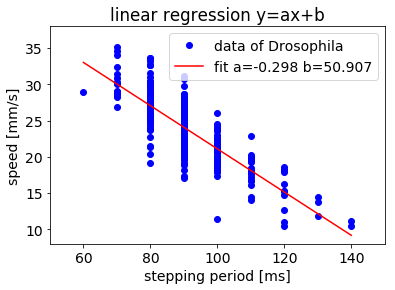

In [8]:
'''show the fit result'''
plt.plot(x, y, 'bo', label='data of Drosophila')         # raw data as dots
plt.plot(x, fct_y(x, a, b), 'r-', label='fit a={:.3f} b={:.3f}'.format(a, b))
plt.title('linear regression y=ax+b')                    # fitted line
plt.axis((50, 150, 8, 38))
plt.xlabel('stepping period [ms]')
plt.ylabel('speed [mm/s]')
plt.legend(loc='upper right');

### fit with scipy.stats

In [9]:
'''fit it with scipy directly'''
from scipy import stats          # contains also fitting routines, 
fit = stats.linregress(x, y)     #     e.g. linear regression fit
print('fitted by scipy:  y = {:.3f}*x + {:.3f}'.format(fit.slope, fit.intercept))

fitted by scipy:  y = -0.298*x + 50.907


linear fit:  x = -2.248*y + 144.473


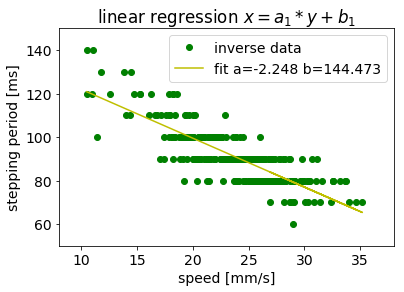

In [11]:
'''fit the reverse values x(y)'''
fit_r = stats.linregress(y, x)               # linear regression of reverse data
print('linear fit:  x = {:.3f}*y + {:.3f}'.format(fit_r.slope, fit_r.intercept))
plt.plot(y, x, 'go', label='inverse data')
plt.plot(y, fct_y(y, fit_r.slope, fit_r.intercept), 'y-',
         label='fit a={:.3f} b={:.3f}'.format(fit_r.slope, fit_r.intercept))
plt.title('linear regression $x=a_1*y+b_1$') # yes, matplotlib speaks LaTeX
plt.axis((8, 38, 50, 150))
plt.ylabel('stepping period [ms]')
plt.xlabel('speed [mm/s]')
plt.legend(loc='upper right');

In [12]:
''' Correlation coefficient Pearson r, see 022 lecture'''
def ccpearson( a, b ):
    return np.corrcoef(a, b)[0][1]     # side element of correlation matrix

'''compare fits of data versus reverse-data'''
print('slope {:.3f} * inverse slope {:.3f} = {:.3f} does not equal 1.000'
      .format(fit.slope, fit_r.slope, fit.slope*fit_r.slope))
print('but correlation coefficients match: {:.5f} = {:.5f}'
      .format(ccpearson(x, y), ccpearson(y, x)))

slope -0.298 * inverse slope -2.248 = 0.670 does not equal 1.000
but correlation coefficients match: -0.81869 = -0.81869


## Nicht-lineares Beispiel: Wurfparabel

In [13]:
np.random.seed(98765)
deltaT = 0.1                       # time steps in seconds
period = 6                         # duration of flight in sec
g = 9.81                           # gravity constant
ae = 0.15                          # speed dependent noise amplitude
be = 0.05                          # constant noise amplitude
v0 = 15                            # speed at start in m/s
numOfPoints = int(period/deltaT)   # measured points
t_a  = np.zeros(numOfPoints)       # time value[]
v_a  = np.zeros(numOfPoints)       # vertical speed[]
yt_a = np.zeros(numOfPoints)       # y theoretically[]
y_a  = np.zeros(numOfPoints)       # y result: with noise[]
for it in range(numOfPoints):      # calculate
    t = it*deltaT                  # time now
    t_a[it] = t                    # store
    v = v0-g*t                     # speed reduced by gravity
    v_a[it] = v                    # store
    yt = -g*t**2/2+v0*t            # squared by gravitational acceleration
    yt_a[it] = yt                  # store
    error = np.random.normal(loc=0, scale=ae*abs(v)+be)
    y_a[it] = yt+error             # add noise

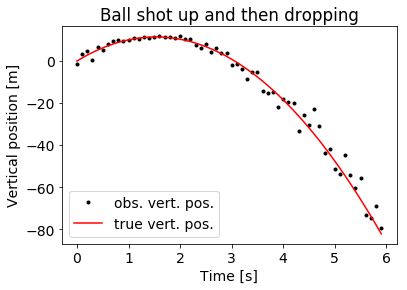

In [14]:
plt.title('Ball shot up and then dropping')
plt.ylabel('Vertical position [m]')
plt.xlabel('Time [s]')
plt.plot(t_a, y_a, 'k.', label='obs. vert. pos.')  # observed points with noise
plt.plot(t_a, yt_a, 'r-', label='true vert. pos.') # theoretical position
plt.legend(loc="lower left");

In [15]:
'''How to fit a polynomial dependency (example: squared)?'''
np.polyfit?

In [16]:
'''use polyfit (square----v) to extract parabolic parameters'''
pp = np.polyfit(t_a, y_a, 2)        # polynomparameters from fit of degree 2
print('fitted polynom has parameters pp={}'.format(pp))

fitted polynom has parameters pp=[ -4.54965459  13.37918126   1.2131438 ]


gravitational constant =  9.099 m/s^2
starting speed was v0  = 13.379 m/s


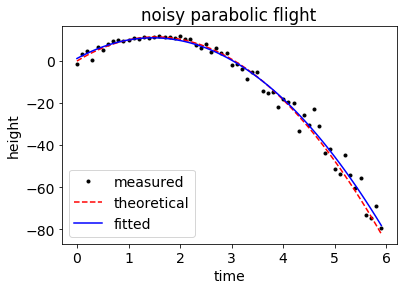

In [17]:
'''compare measured and fitted values (with randomly drawn distribution)'''
plt.plot(t_a, y_a, 'k.', label='measured')
plt.plot(t_a, yt_a, 'r--', label='theoretical')
py = np.poly1d(pp)           # define polynomial function with fitted parameters
plt.plot(t_a, py(t_a), 'b-', label='fitted')# show fitted locations versus time
plt.legend(loc='lower left')
plt.title("noisy parabolic flight")
plt.xlabel('time')
plt.ylabel('height')
print('gravitational constant = {:6.3f} m/s^2'.format(-2*pp[0])) # from y ~ -g*t^2/2
print('starting speed was v0  = {:6.3f} m/s'.format(pp[1]))      # derivative at t=0

#### Siehe auch
- `numpy.polyfit`
- `scipy.optimize.curve_fit`

fitted polynom of degree 14 has parameters p14=
[ -1.71045973e-03   7.25881832e-02  -1.37704393e+00   1.54074336e+01
  -1.12969223e+02   5.70392805e+02  -2.02844834e+03   5.10788156e+03
  -9.02800340e+03   1.09398432e+04  -8.70967673e+03   4.23721214e+03
  -1.11180856e+03   1.33379787e+02  -1.67218166e+00]


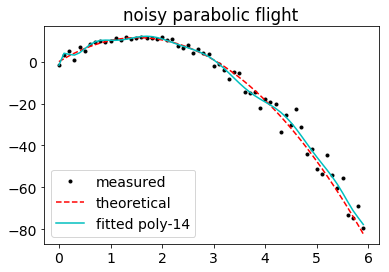

In [18]:
p14 = np.polyfit(t_a, y_a, 14)       # polynomparameters from fit of degree 14 (?)
print('fitted polynom of degree {} has parameters p14=\n{}'.format(len(p14)-1, p14))
plt.plot(t_a, y_a, 'k.', label='measured')
plt.plot(t_a, yt_a, 'r--', label='theoretical')
py = np.poly1d(p14)                  # define polynomial function with parameters
plt.plot(t_a, py(t_a), 'c-', label='fitted poly-14')
plt.legend(loc='lower left')
plt.title("noisy parabolic flight");

In [19]:
'''compare polynomial coefficients and residual error'''
pp14, residual14, rk, sv, rc = np.polyfit(t_a, y_a, 14, full=True)
pp2, residual2, rk, sv, rc = np.polyfit(t_a, y_a, 2, full=True)
print('polynomial models with {} / {} parameters decreases residual error from {:.1f} to {:.1f}'.
      format(len(pp2), len(pp14), residual2[0], residual14[0]))
for ppx in [pp2, pp14]:
    l = len(ppx)
    print('last 3 parameters of {:2d}-parameter model: {:8.2f}, {:8.2f}, {:8.2f}'.
          format(l, ppx[l-3], ppx[l-2], ppx[l-1]))

polynomial models with 3 / 15 parameters decreases residual error from 668.9 to 581.9
last 3 parameters of  3-parameter model:    -4.55,    13.38,     1.21
last 3 parameters of 15-parameter model: -1111.81,   133.38,    -1.67


#### Ergebnis:
- obwohl der Restfehler weniger wird 
    - für das 14-parametrige Modell
    - gegenüber dem (korrekten) parabolischen
- ist das Ergebnis zweifelhaft
    - Ein Ball steigt nicht wieder
    - der quadratische Koeffizient ist unsinnig hoch

# Fragen?

# Zusammenfassung beschreibende Statistik
- Datenreduktion
- Kenngrößen herausarbeiten
    - Mittelwert
    - Standardabweichung
    - Korrelationskoeffizient
- Struktur in den Daten erkennen
    - Form (Normalverteilung, Gleichverteilung, ...)
- Anschauliche Darstellung
    - Box-Plot
    - Fehlerbalken
    - Histogramm
    - 2D-Histogramm
- Vergleichbarkeit unter ähnlichen Bedingungen
- Abhängigkeit mehrerer Variabler
    - Korrelation
    - Regression

# Fragen an die Statistik
- Was ist die *wahre* Größe bei mehreren Messungen/Daten?
- Wie genau ist das erlangte Wissen?
- Was sind Ausreisser
- Effekt zwischen unterschiedlichen Versuchsbedingungen?
    - andere Wert?
    - andere Verteilung?
    - Zufall?
- Abhängigkeit wenn nichtlinear?

# Ausblick
- Wahrscheinlichkeitstheoretische Modelle
    - Entspricht das Histogramm einer bekannten Verteilung?
    - Wie kommen die Daten zustande?
- Schließende Statistik arbeitet mit Wahrscheinlichkeiten
    - Gibt es grundlegende Parameter der Daten?

# Links
- Matplotlib Graphikgalerie http://matplotlib.org/gallery.html
- Pandas Graphiken: http://pandas.pydata.org/pandas-docs/stable/visualization.html


# Fragen?